# Greedy Heuristics for TSP with Node Selection

## Problem Description

Given a set of nodes with (x, y) coordinates and costs, the goal is to:
1. **Select exactly 50% of nodes** (rounded up if odd number of nodes)
2. **Form a Hamiltonian cycle** through the selected nodes
3. **Minimize the objective function**: total path length + sum of selected node costs
4. **Distance calculation**: Euclidean distances rounded to nearest integer

## Implemented Algorithms

### 1. Random Solution
**Pseudocode:**
```
1. Randomly select required number of nodes from all available nodes
2. Create random permutation of selected nodes as route
3. Return solution with selected nodes and route
```

### 2. Nearest Neighbor Construction Heuristic
**Pseudocode:**
```
1. Select (e.g. randomly) the starting vertex
2. Repeat:
   - Add to the solution the vertex (and the leading edge) closest to 
     the last one added
   Until required number of vertices have been added
3. Add the edge from the last to the first vertex
```

### 3. Nearest Neighbor (Any Position)
**Pseudocode:**
```
1. Start with startNode in the route
2. While route size < required nodes:
   a. For each unselected node:
      - For each possible position in route:
        * Calculate objective change if inserted at this position
      - Keep best position for this node
   b. Select node and position with best objective change
   c. Insert selected node at best position
3. Return solution
```

### 4. Greedy Cycle Construction Heuristic
**Pseudocode:**
```
1. Select (e.g. randomly) the starting vertex
2. Choose the nearest vertex and create an incomplete cycle from these 
   two vertices
3. Repeat:
   - Insert into the current cycle in the best possible place the vertex 
     causing the smallest increase in cycle length
   Until required number of vertices have been added
```

**Note:** "Nearest" and "closest" consider the best change in objective function (distance + cost), not just geometric distance.

## Setup and Data Loading

In [11]:
# Import utilities and libraries
import sys
import os
import importlib

# Add analysis directory to Python path (notebook runs from project root)
analysis_dir = os.path.join(os.getcwd(), 'analysis')
if analysis_dir not in sys.path:
    sys.path.insert(0, analysis_dir)

# Import and reload utils to get latest changes
import utils
importlib.reload(utils)
from utils import *

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
setup_plotting_style()

print("Libraries and utilities imported and reloaded successfully!")

Libraries and utilities imported and reloaded successfully!


In [12]:

# Add analysis directory to Python path (notebook runs from project root)
analysis_dir = os.path.join(os.getcwd(), 'analysis')
if analysis_dir not in sys.path:
    sys.path.insert(0, analysis_dir)

# Import and reload utils to get latest changes
import utils
importlib.reload(utils)
from utils import *

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
setup_plotting_style()

print("Libraries and utilities imported and reloaded successfully!")

Libraries and utilities imported and reloaded successfully!


## Configuration

Configure the analysis parameters and algorithm folder to analyze.

In [13]:
# Configuration: Set the algorithm folder name here
# Change this to analyze different algorithm results (e.g., "greedy", "genetic", "simulated_annealing", etc.)
ALGORITHM_FOLDER = "greedy"

# Instances to analyze (can be modified as needed)
INSTANCES = ['TSPA', 'TSPB']

# Export settings
EXPORT_ENABLED = False
EXPORT_PLOTS = False
PLOT_FORMAT = 'png'  # Options: 'png', 'pdf', 'svg'
PLOT_DPI = 300

print(f"Configuration set:")
print(f"  Algorithm folder: {ALGORITHM_FOLDER}")
print(f"  Instances: {INSTANCES}")
print(f"  Export enabled: {EXPORT_ENABLED}")
print(f"  Plot format: {PLOT_FORMAT} (DPI: {PLOT_DPI})")

Configuration set:
  Algorithm folder: greedy
  Instances: ['TSPA', 'TSPB']
  Export enabled: False
  Plot format: png (DPI: 300)


In [14]:
# Load algorithm data using utility functions
algorithm_data = load_all_algorithm_results(ALGORITHM_FOLDER, INSTANCES)

if algorithm_data:
    print(f"\nSuccessfully loaded data for {len(algorithm_data)} instances")
    for instance_name, data in algorithm_data.items():
        df = data['df']
        print(f"{instance_name}: {len(df)} results")
else:
    print("No data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")
    print(f"Available algorithm folders: {get_available_algorithm_folders()}")
    for folder in get_available_algorithm_folders():
        instances = get_available_instances(folder)
        print(f"  {folder}: {instances}")

Loaded 800 results for TSPA from greedy folder
Algorithms: ['GreedyCycle', 'NearestNeighborAny', 'NearestNeighborEnd', 'RandomSolution']
Loaded 800 results for TSPB from greedy folder
Algorithms: ['GreedyCycle', 'NearestNeighborAny', 'NearestNeighborEnd', 'RandomSolution']

Successfully loaded data for 2 instances
TSPA: 800 results
TSPB: 800 results


## Visualization Data Exporter

This section provides functionality to export visualization data and results to files for use in other analysis tools.

In [15]:
# Create exporter instance using the utility class
exporter = VisualizationExporter(ALGORITHM_FOLDER)
print(f"Visualization exporter created for algorithm folder: {ALGORITHM_FOLDER}")
print(f"Output directory: {exporter.output_dir}")

Visualization exporter created for algorithm folder: greedy
Output directory: ../results/greedy


## Computational Experiment Results

## Export Results

Export the loaded algorithm results to various formats for further analysis and archival.

In [16]:
# Export all results using the visualization exporter
if algorithm_data and EXPORT_ENABLED:
    print("Exporting algorithm results...")
    
    # Export best solutions data
    exporter.export_best_solutions_data(algorithm_data, filename_suffix="_analysis")
    
    # Export statistical summaries
    exporter.export_statistics_summary(algorithm_data, filename_suffix="_analysis")
    
    # Export visualization plots (if enabled)
    if EXPORT_PLOTS:
        exporter.export_visualization_plots(algorithm_data, filename_suffix="_analysis", 
                                           save_format=PLOT_FORMAT, dpi=PLOT_DPI)
    
    print(f"\nAll exports completed! Files saved to: {exporter.output_dir}")
    print(f"Algorithm folder: {ALGORITHM_FOLDER}")
elif not EXPORT_ENABLED:
    print("Export is disabled. Set EXPORT_ENABLED = True to enable exporting.")
else:
    print("No algorithm data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")

Export is disabled. Set EXPORT_ENABLED = True to enable exporting.


In [17]:
# Display algorithm statistics using utility function
display_algorithm_statistics(algorithm_data)


INSTANCE: TSPA

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
RandomSolution       200      243278.00  305987.00  265664.97  YES       
GreedyCycle          200      71488.00   74410.00   72635.98   YES       
NearestNeighborAny   200      71179.00   75450.00   73166.27   YES       
NearestNeighborEnd   200      83182.00   89433.00   85108.51   YES       

INSTANCE: TSPB

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
RandomSolution       200      188500.00  236008.00  212763.80  YES       
GreedyCycle          200      49001.00   57324.00   51400.60   YES       
Near

## 2D Visualization of Best Solutions


TSPA - BEST SOLUTIONS



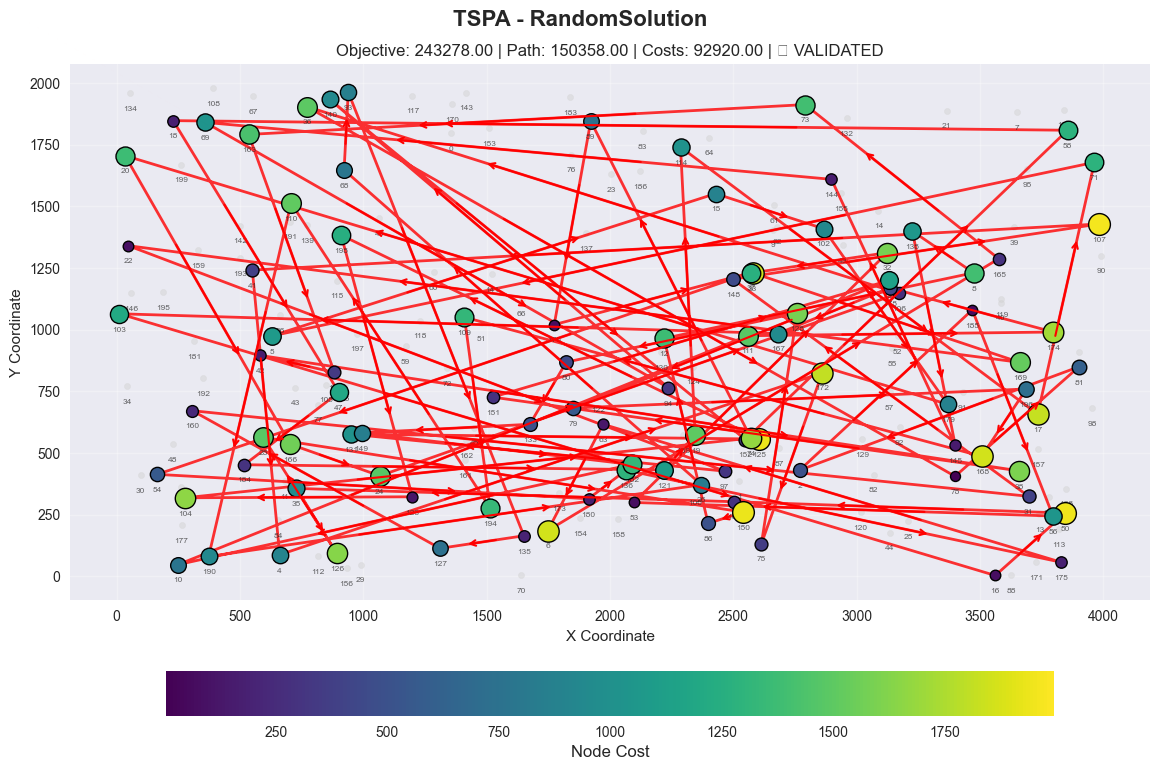


RandomSolution
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 243278.00
Path Length: 150358.00
Node Costs: 92920.00
Selected Nodes: 100

Node Order (Route):
69, 94, 140, 152, 58, 18, 47, 184, 121, 19, 114, 17, 71, 5, 15, 102, 179, 20, 166, 24, 106, 36, 78, 81, 2, 185, 56, 53, 32, 33, 169, 22, 97, 131, 125, 198, 123, 104, 74, 89, 176, 37, 54, 180, 136, 175, 63, 6, 165, 73, 163, 116, 42, 38, 151, 3, 79, 196, 168, 109, 194, 110, 190, 26, 68, 93, 135, 127, 160, 31, 148, 107, 41, 4, 172, 75, 128, 80, 133, 149, 182, 10, 111, 174, 178, 167, 103, 16, 50, 101, 35, 126, 28, 150, 86, 12, 8, 138, 145, 144




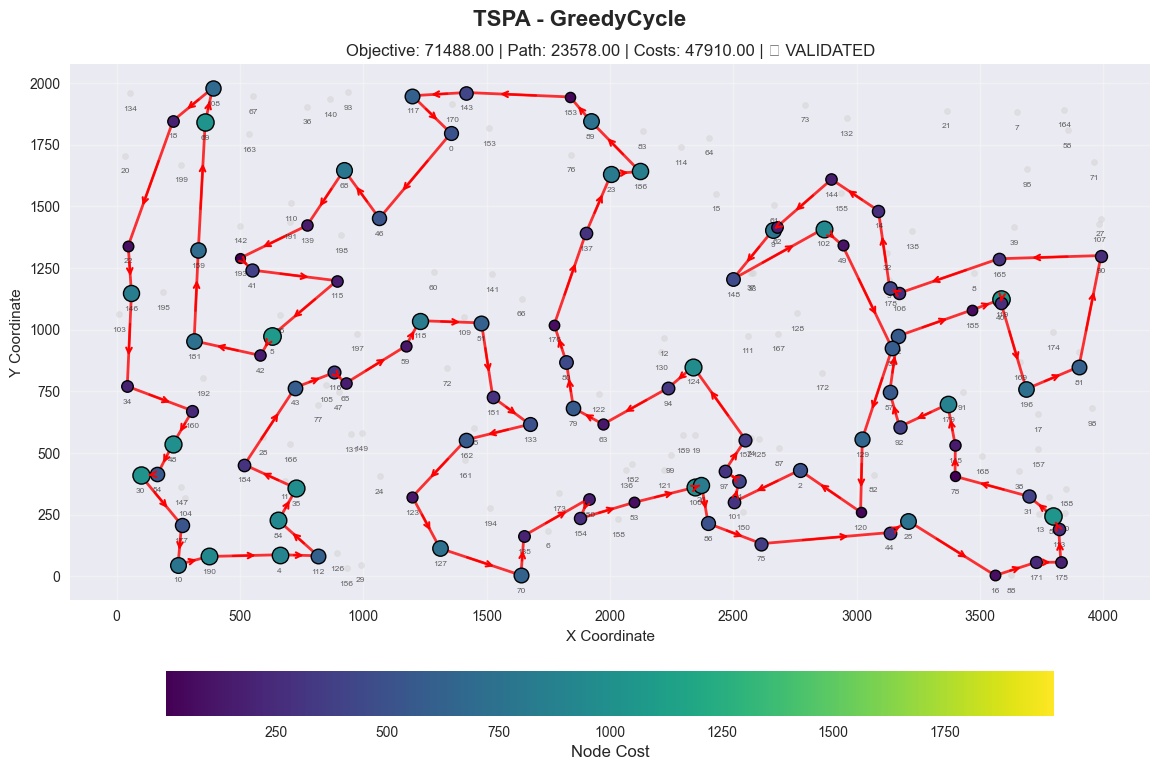


GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 71488.00
Path Length: 23578.00
Node Costs: 47910.00
Selected Nodes: 100

Node Order (Route):
0, 46, 68, 139, 193, 41, 115, 5, 42, 181, 159, 69, 108, 18, 22, 146, 34, 160, 48, 54, 30, 177, 10, 190, 4, 112, 84, 35, 184, 43, 116, 65, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 180, 154, 53, 100, 26, 86, 75, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 57, 52, 185, 119, 40, 196, 81, 90, 165, 106, 178, 14, 144, 62, 9, 148, 102, 49, 55, 129, 120, 2, 101, 1, 97, 152, 124, 94, 63, 79, 80, 176, 137, 23, 186, 89, 183, 143, 117




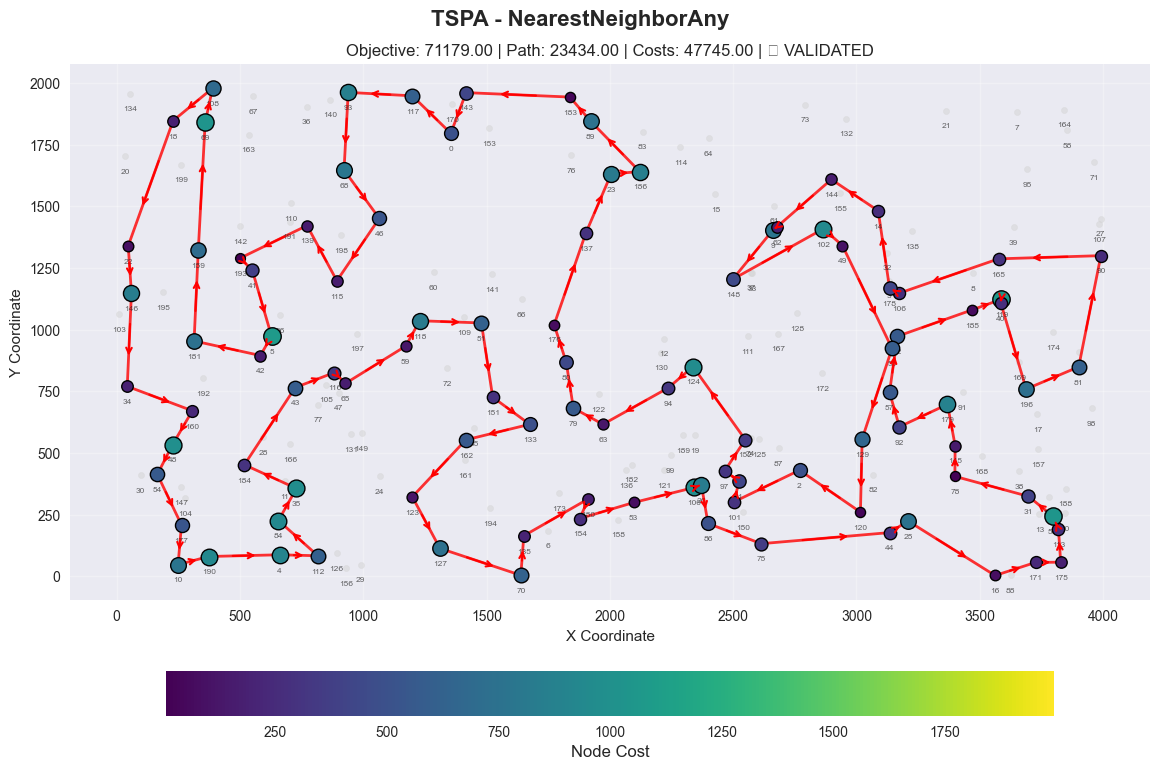


NearestNeighborAny
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 71179.00
Path Length: 23434.00
Node Costs: 47745.00
Selected Nodes: 100

Node Order (Route):
68, 46, 115, 139, 193, 41, 5, 42, 181, 159, 69, 108, 18, 22, 146, 34, 160, 48, 54, 177, 10, 190, 4, 112, 84, 35, 184, 43, 116, 65, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 180, 154, 53, 100, 26, 86, 75, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 57, 52, 185, 119, 40, 196, 81, 90, 165, 106, 178, 14, 144, 62, 9, 148, 102, 49, 55, 129, 120, 2, 101, 1, 97, 152, 124, 94, 63, 79, 80, 176, 137, 23, 186, 89, 183, 143, 0, 117, 93




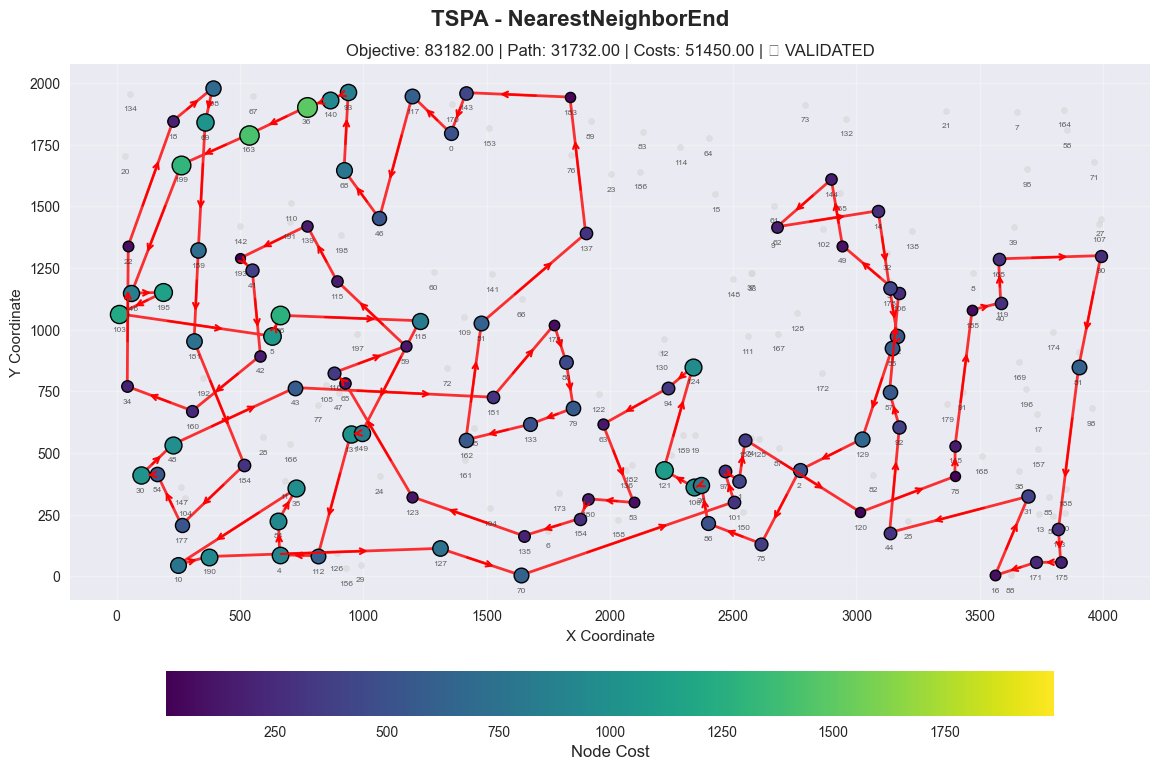


NearestNeighborEnd
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 83182.00
Path Length: 31732.00
Node Costs: 51450.00
Selected Nodes: 100

Node Order (Route):
124, 94, 63, 53, 180, 154, 135, 123, 65, 116, 59, 115, 139, 193, 41, 42, 160, 34, 22, 18, 108, 69, 159, 181, 184, 177, 54, 30, 48, 43, 151, 176, 80, 79, 133, 162, 51, 137, 183, 143, 0, 117, 46, 68, 93, 140, 36, 163, 199, 146, 195, 103, 5, 96, 118, 149, 131, 112, 4, 84, 35, 10, 190, 127, 70, 101, 97, 1, 152, 120, 78, 145, 185, 40, 165, 90, 81, 113, 175, 171, 16, 31, 44, 92, 57, 106, 49, 144, 62, 14, 178, 52, 55, 129, 2, 75, 86, 26, 100, 121



TSPB - BEST SOLUTIONS



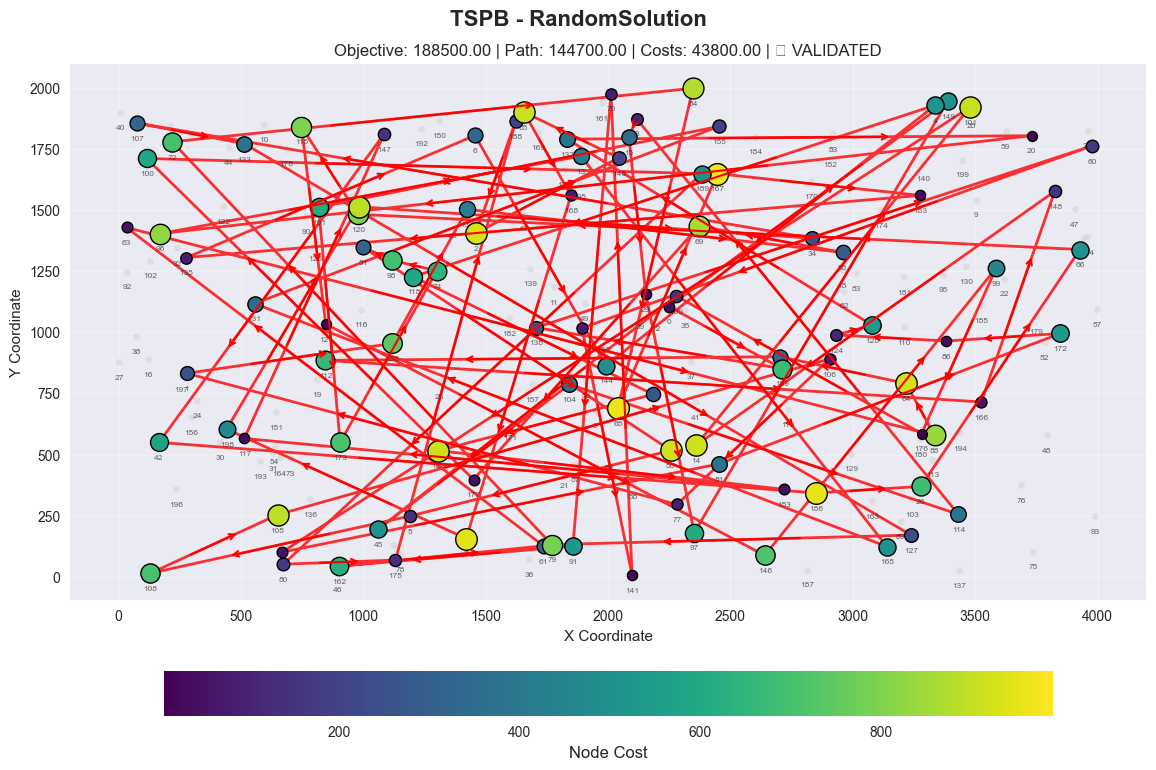


RandomSolution
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 188500.00
Path Length: 144700.00
Node Costs: 43800.00
Selected Nodes: 100

Node Order (Route):
112, 166, 148, 14, 101, 190, 81, 172, 86, 124, 128, 132, 20, 96, 13, 165, 131, 155, 191, 173, 74, 98, 51, 50, 5, 108, 105, 106, 77, 1, 158, 134, 55, 69, 177, 100, 189, 80, 175, 188, 2, 145, 65, 168, 7, 198, 67, 34, 107, 133, 127, 79, 72, 84, 68, 167, 183, 135, 6, 144, 4, 118, 111, 123, 153, 117, 147, 42, 186, 26, 66, 120, 115, 121, 146, 99, 176, 109, 45, 104, 114, 3, 15, 29, 97, 149, 0, 159, 138, 60, 33, 141, 70, 91, 162, 61, 63, 88, 64, 143




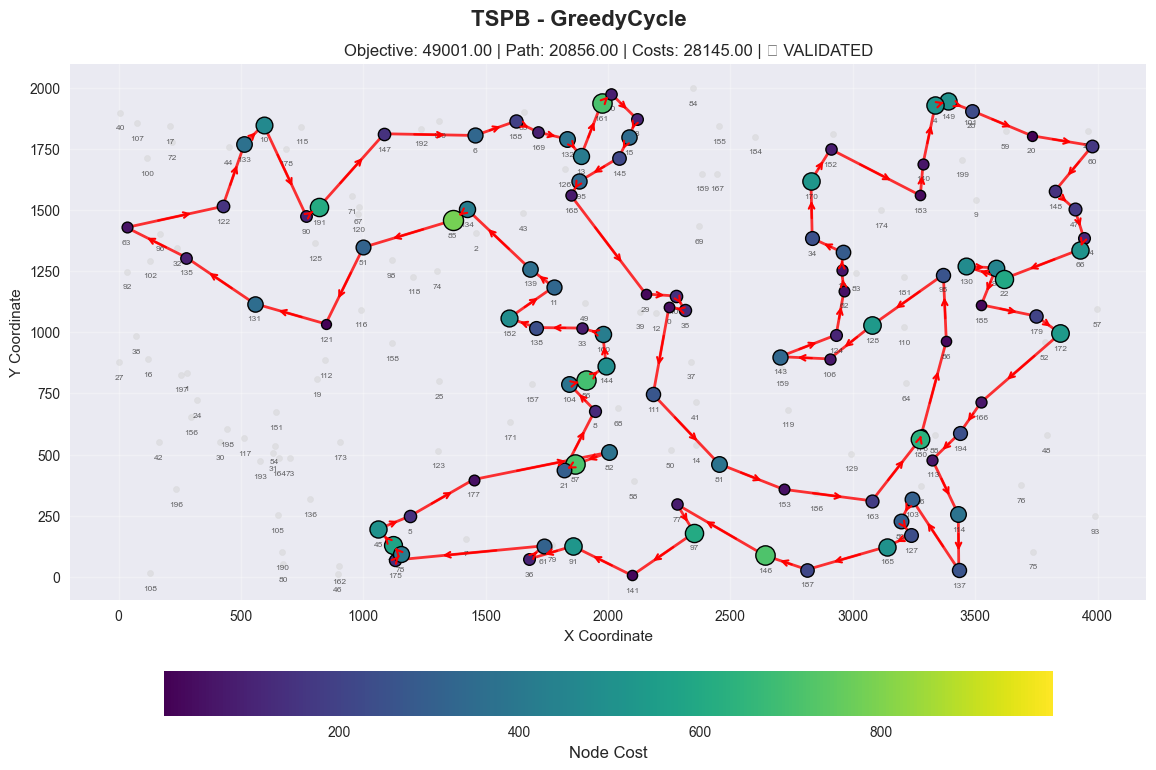


GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 49001.00
Path Length: 20856.00
Node Costs: 28145.00
Selected Nodes: 100

Node Order (Route):
85, 51, 121, 131, 135, 63, 122, 133, 10, 90, 191, 147, 6, 188, 169, 132, 13, 161, 70, 3, 15, 145, 195, 168, 29, 109, 35, 0, 111, 81, 153, 163, 180, 176, 86, 95, 128, 106, 143, 124, 62, 18, 55, 34, 170, 152, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 22, 130, 99, 185, 179, 172, 166, 194, 113, 114, 137, 103, 89, 127, 165, 187, 146, 77, 97, 141, 91, 36, 61, 175, 78, 142, 45, 5, 177, 82, 87, 21, 8, 104, 56, 144, 160, 33, 138, 182, 11, 139, 134




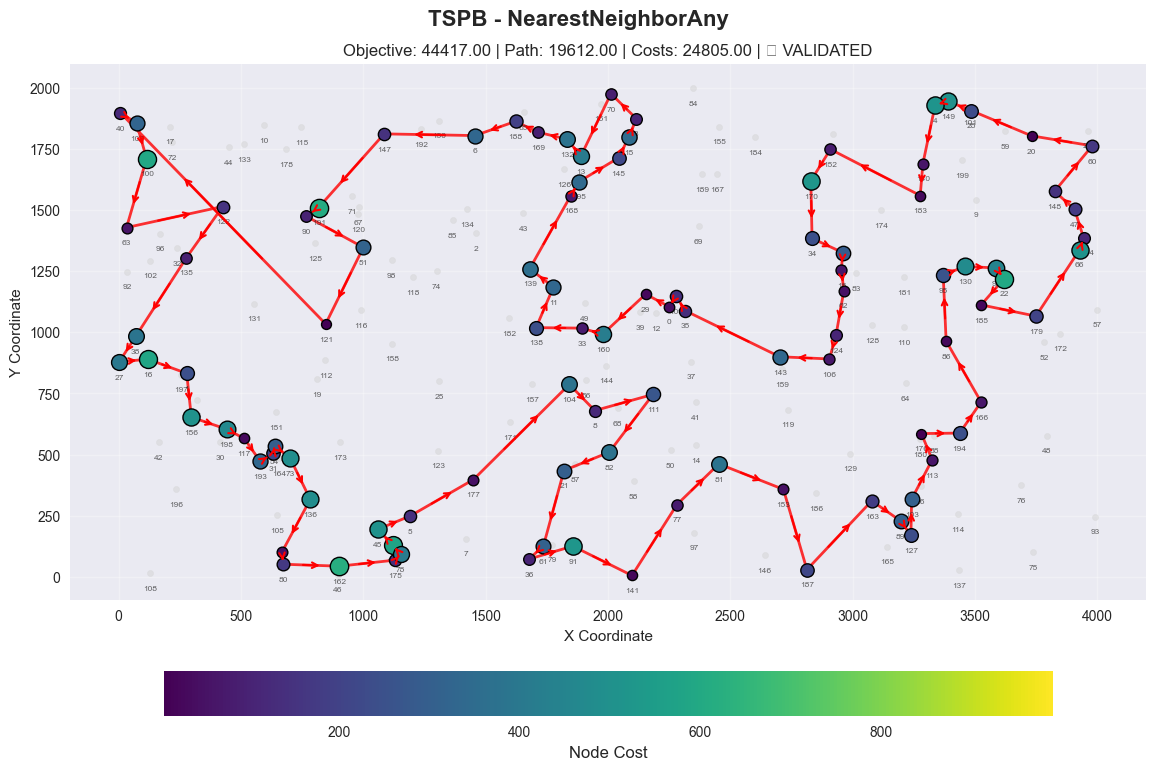


NearestNeighborAny
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 44417.00
Path Length: 19612.00
Node Costs: 24805.00
Selected Nodes: 100

Node Order (Route):
40, 107, 100, 63, 122, 135, 38, 27, 16, 1, 156, 198, 117, 193, 31, 54, 73, 136, 190, 80, 162, 175, 78, 142, 45, 5, 177, 104, 8, 111, 82, 21, 61, 36, 91, 141, 77, 81, 153, 187, 163, 89, 127, 103, 113, 176, 194, 166, 86, 95, 130, 99, 22, 185, 179, 66, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 152, 170, 34, 55, 18, 62, 124, 106, 143, 35, 109, 0, 29, 160, 33, 138, 11, 139, 168, 195, 145, 15, 3, 70, 13, 132, 169, 188, 6, 147, 191, 90, 51, 121




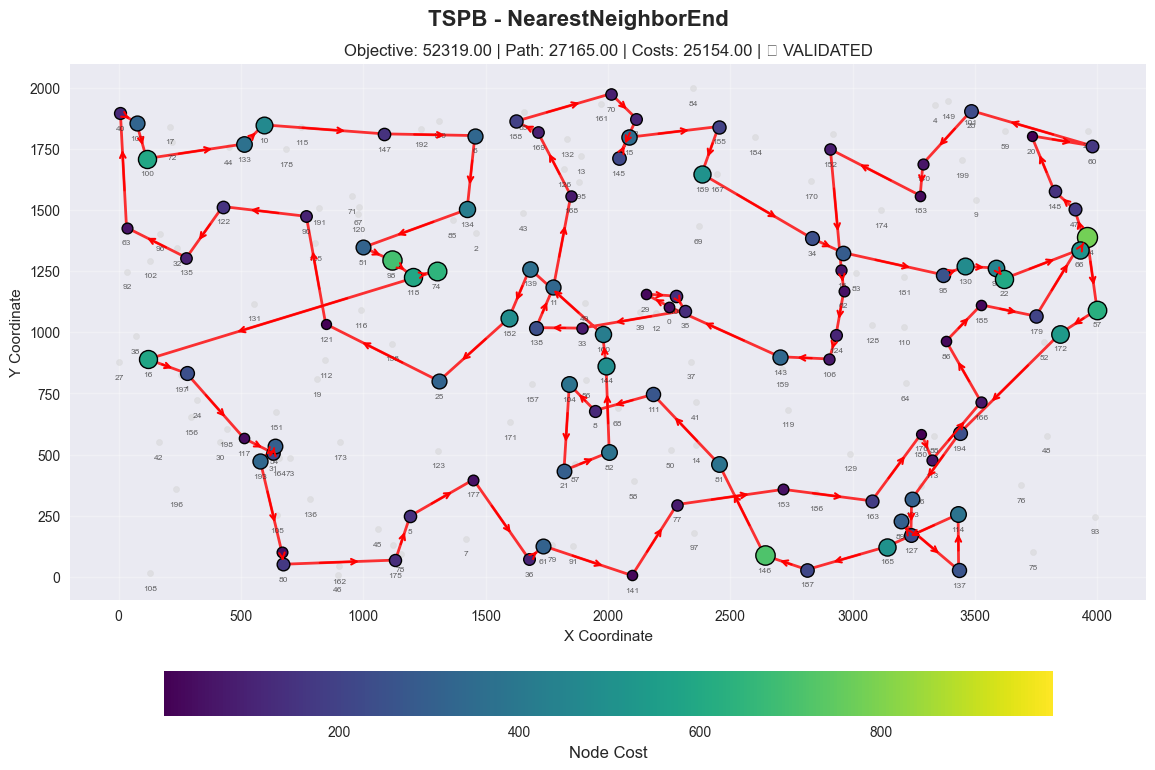


NearestNeighborEnd
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 52319.00
Path Length: 27165.00
Node Costs: 25154.00
Selected Nodes: 100

Node Order (Route):
16, 1, 117, 31, 54, 193, 190, 80, 175, 5, 177, 36, 61, 141, 77, 153, 163, 176, 113, 166, 86, 185, 179, 94, 47, 148, 20, 60, 28, 140, 183, 152, 18, 62, 124, 106, 143, 0, 29, 109, 35, 33, 138, 11, 168, 169, 188, 70, 3, 145, 15, 155, 189, 34, 55, 95, 130, 99, 22, 66, 154, 57, 172, 194, 103, 127, 89, 137, 114, 165, 187, 146, 81, 111, 8, 104, 21, 82, 144, 160, 139, 182, 25, 121, 90, 122, 135, 63, 40, 107, 100, 133, 10, 147, 6, 134, 51, 98, 118, 74




In [18]:
# Plot best solutions using utility function
plot_best_solutions(algorithm_data)

# Best solution validation
In additional to the validator created by us, all of the 4 best solutions were checked manually by copying the nodes numbers to the solution checker excel.

## Algorithm Performance Comparison

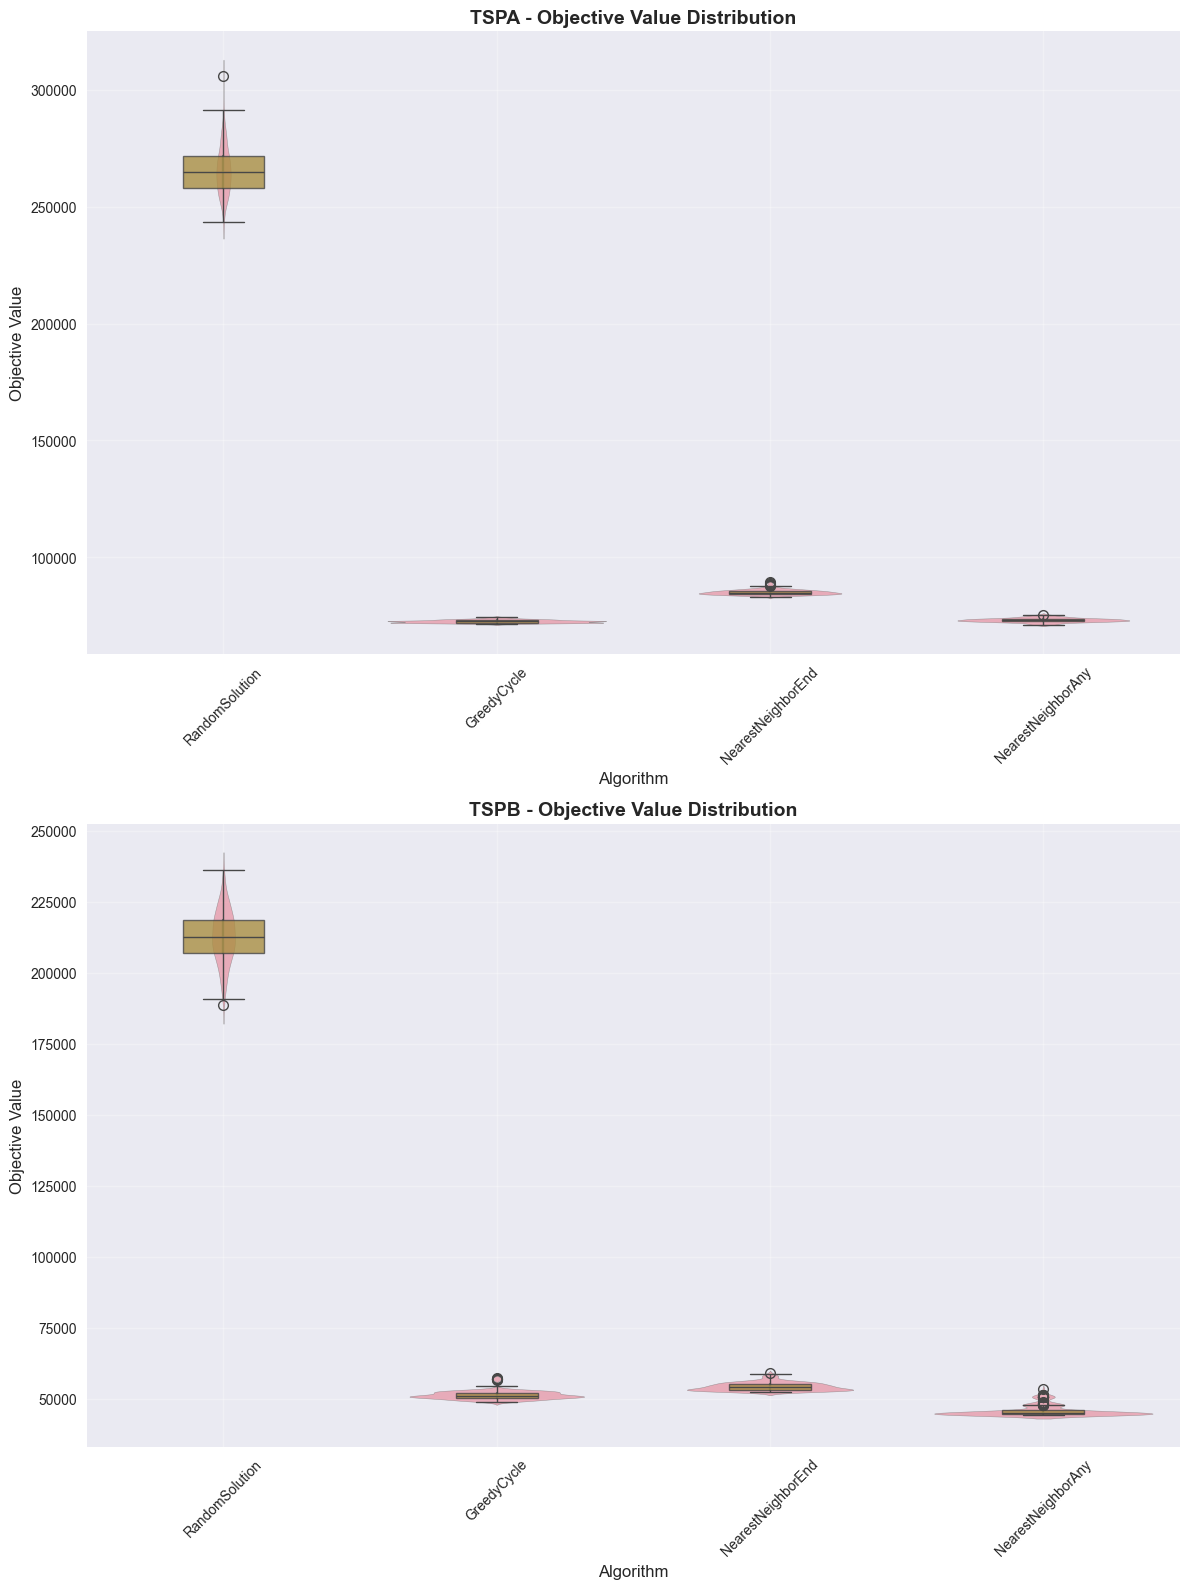

In [19]:
# Performance comparison plots using utility functions
plot_objective_distributions(algorithm_data)

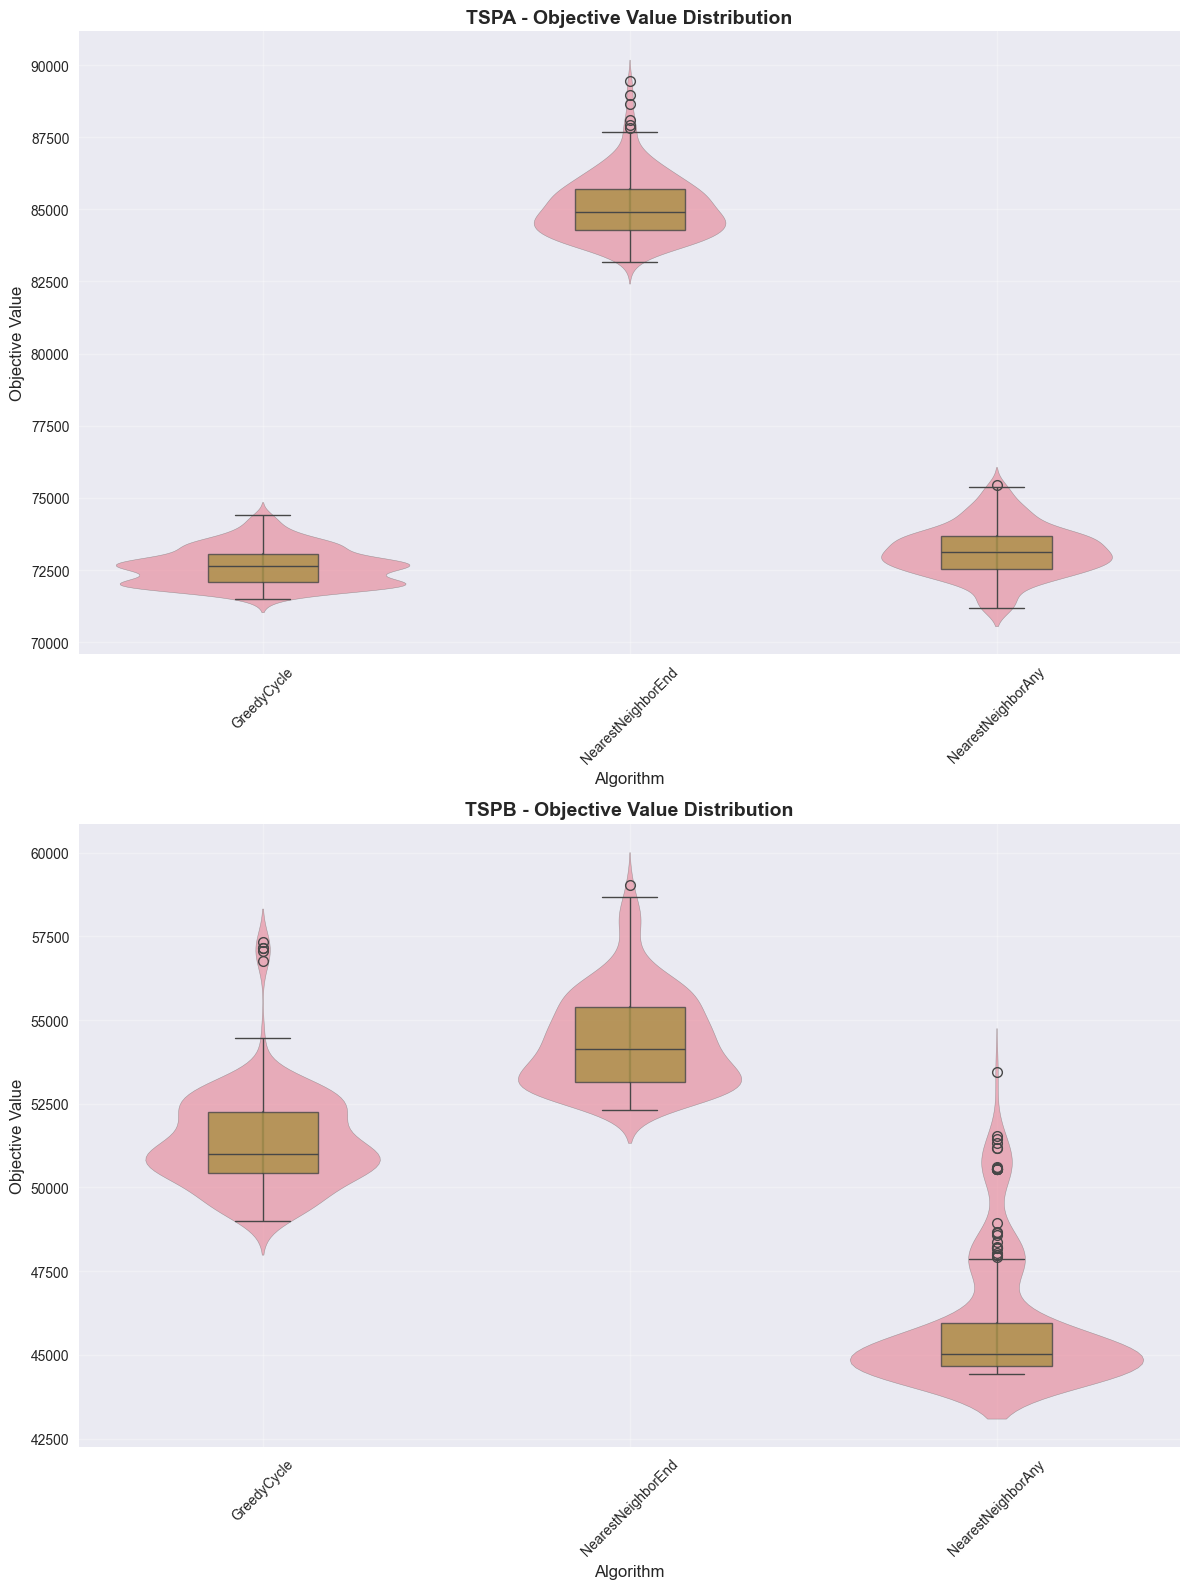

In [20]:
# Performance comparison plots using utility functions
# without random for better visibility
plot_objective_distributions(algorithm_data, ["RandomSolution"])

### Source Code

The complete implementation is available in the project repository:
- Java source code: `src/main/java/tsp/algorithms/greedyAlgorithms/`
- This analysis notebook: `TSP_Greedy_Analysis.ipynb`

## Conclusions
- The random solution is obviously the worst, however it has 1 benefit. It is the fastest
- Second worst is the nearest neighbor, which can only insert on the end. Again it is not surprising, however it has O(N) time complexity, which is much better than O(N^2) of the next two methods
- While nearest neighboar allowing all positions is similar to the greedy cycle, it performs slightly better, especially on the second test case. They both have the same time complexity. However, it is hard to say whether different examples would have different outcome.